In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes
from sklearn import metrics
from imblearn import over_sampling
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [14]:
'''
Prepare data for logistic regression
    - Create binary label
    - Drop non-numeric features
'''

# Load data
data = pd.read_csv('Data/ads_data_clean.csv')
data_GNB = data.copy()

# Create label
citation_count_label = []
for i in range(len(data)):
    row = data.iloc[i]
    label = 'LowCC' if row['citation_count'] <= 0.16 else 'HighCC' 
    citation_count_label.append(label)
data_GNB['citation_count_label'] = citation_count_label
data_GNB.drop(columns=['citation_count'], inplace=True)

# Drop non-numeric columns
data_GNB.drop(columns=['bibcode', 'doi', 'aff', 'bibstem', 'arxiv_class'], inplace=True)
display(data_GNB)

,author_count,year,read_count,download_count,journal_rank,citation_count_label
0,-0.342659,0.399746,15.781133,0.691080,-0.718169,LowCC
1,0.411490,0.191319,5.439945,4.147883,-0.405034,HighCC
2,-0.342659,1.025027,1.420615,-0.940852,-0.207874,LowCC
3,0.746667,-0.642389,6.174266,3.974185,-0.405034,HighCC
4,-0.334280,-1.267670,3.746686,2.386458,-0.526809,HighCC
...,...,...,...,...,...,...
987,-0.346849,-1.684524,-0.096406,0.183506,-0.613791,LowCC
988,-0.149932,-1.892951,0.557356,0.672878,-0.422430,LowCC
989,-0.296572,-1.892951,0.151535,0.377487,-0.439827,LowCC
990,-0.330090,-1.892951,0.280474,0.536624,3.312001,LowCC


,author_count,year,read_count,download_count,journal_rank
0,-0.330090,-0.642389,0.490187,1.051998,-0.439827
1,-0.342659,-0.642389,0.231447,0.380607,0.806917
2,-0.233727,1.025027,-0.101806,0.090937,-0.405034
3,0.093071,1.025027,-0.771766,-0.888846,-0.207874
4,-0.200209,1.025027,-0.434626,-0.456681,-0.405034
...,...,...,...,...,...
1167,-0.296572,-0.433962,1.064038,1.416036,-0.422430
1168,-0.321711,-1.267670,-0.058394,-0.228897,-0.422430
1169,4.274408,-0.433962,-0.548014,-0.755192,-0.207874
1170,-0.338470,-1.684524,-0.576955,-0.893527,-0.410833


,author_count,year,read_count,download_count,journal_rank
213,-0.271434,-1.059243,0.929484,0.404010,-0.526809
331,-0.279813,-1.684524,1.061878,1.319306,3.312001
501,-0.183450,1.025027,-0.862044,-0.952293,-0.718169
309,0.315126,1.025027,-0.604168,-0.716708,-0.207874
88,2.590142,-0.850816,-0.137874,-0.510247,-0.509412
...,...,...,...,...,...
705,-0.237916,1.025027,-0.831375,-0.932011,3.312001
305,0.130779,0.816600,-0.503738,-0.533129,-0.207874
809,-0.346849,-1.267670,-0.409141,-0.622058,1.873897
237,-0.263055,1.025027,-0.644555,-0.613737,-0.445625


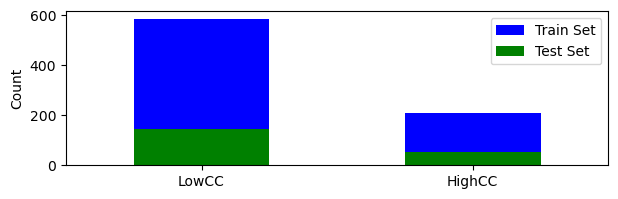

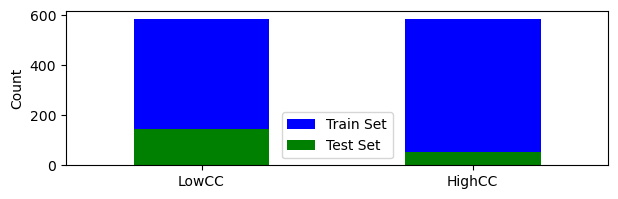

In [16]:
'''
TTS Guassian NB Dataset
  - Do I need to oversample?
'''

# Split into X and y and train and test
X = data_GNB.drop(columns=['citation_count_label'])
y = data_GNB['citation_count_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(7, 2))
y_train.value_counts().plot.bar(rot=0, color='b', label='Train Set')
y_test.value_counts().plot.bar(rot=0, color='g', label='Test Set')
plt.legend()
plt.ylabel('Count')

# Apply oversampling to training set
sm = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
plt.figure(figsize=(7, 2))
y_train.value_counts().plot.bar(rot=0, color='b', label='Train Set')
y_test.value_counts().plot.bar(rot=0, color='g', label='Test Set')
plt.legend()
plt.ylabel('Count')
display(X_train); display(X_test)
pickle.dump([X_train, y_train, X_test, y_test], open('Data/LgR_TT', 'wb')) # Just for project requirenments 

Overall accuracy for Logistic Regression: 79.9%


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

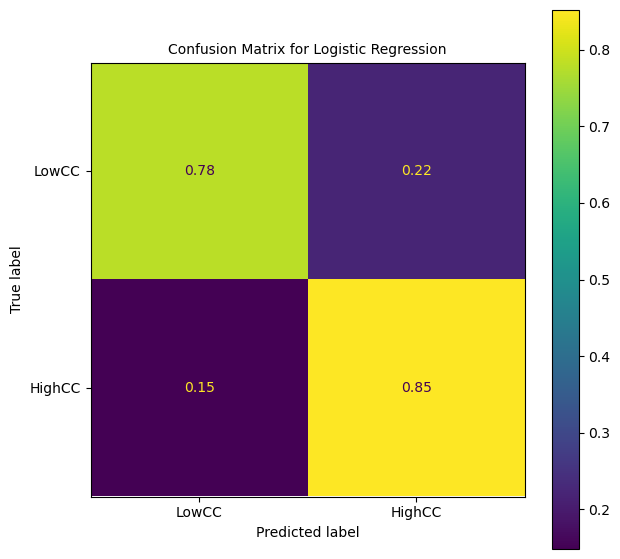

In [11]:
'''
Fit Logistic Regression Model and Predict
'''

LgR = linear_model.LogisticRegression()
model = LgR.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Overall accuracy for Logistic Regression: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'HighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'HighCC'])
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
ax.set_title(f'Confusion Matrix for Logistic Regression', fontsize=10)

,read_count,download_count,author_count,journal_rank,year,citation_count_label
0,5,3,2,1,4,LowCC
1,5,5,4,1,3,HighCC
2,3,1,2,2,4,LowCC
3,5,5,4,1,2,HighCC
4,4,4,2,1,1,HighCC
...,...,...,...,...,...,...
987,2,3,2,1,1,LowCC
988,3,3,3,1,1,LowCC
989,2,3,3,1,1,LowCC
990,2,3,2,5,1,LowCC


Overall accuracy for Guassian NB: 78.39%


Text(0.5, 1.0, 'Confusion Matrix for Multinomial NB')

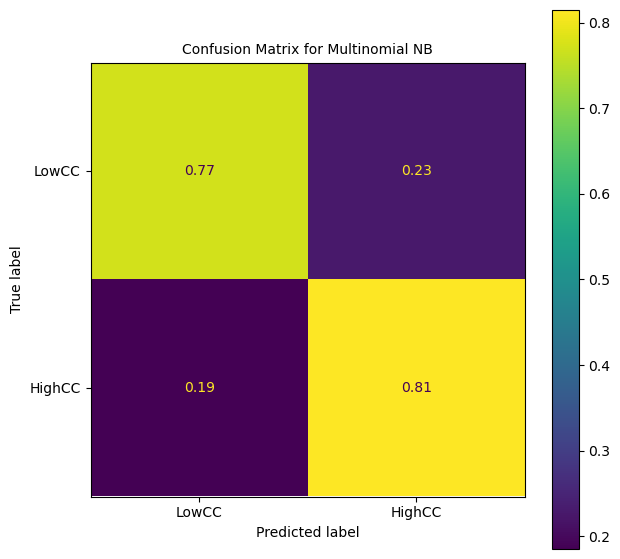

In [9]:
'''
Compare to Multinomial NB
'''
# Prepare data as for Catagoical and Multinomial Naive Bayes in Naive Bayes notebook, except encode class label as binary
data = pd.read_csv('Data/ads_data_clean.csv')
data_CNB = pd.DataFrame(columns = ['read_count', 'download_count', 'author_count', 'journal_rank', 'year', 'citation_count_label'])
for i in range(len(data)):
    row = data.iloc[i]
    read_count = 1 if row['read_count'] <= -0.5 else 2 if row['read_count'] <= 0.5 else 3 if row['read_count'] <= 2 else 4 if row['read_count'] <= 4 else 5 # 1900, 6500, 13500, 23000
    download_count = 1 if row['download_count'] <= -0.75 else 2 if row['download_count'] <= 0 else 3 if row['download_count'] <= 1 else 4 if 2 < row['download_count'] <= 3 else 5 # 550, 2000, 4000, 6000, 8000
    author_count = 1 if row['author_count'] <= -0.4 else 2 if row['author_count'] <= -0.3 else 3 if row['author_count'] <= 0.07 else 4 if row['author_count'] <= 3.8 else 5 # 1, 10, 100, 1000
    journal_rank = 1 if row['journal_rank'] <= -0.4 else 2 if row['journal_rank'] <= 0.25 else 3 if  row['journal_rank'] <= 1.5 else 4 if row['journal_rank'] <=  2.5 else 5
    year = 1 if row['year'] <= -1 else 2 if row['year'] <= -0.4 else 3 if row['year'] <= 0.2 else 4 # 2014, 2017, 2020
    citation_count_label = label = 'LowCC' if row['citation_count'] <= 0.16 else 'HighCC'
    data_CNB.loc[len(data_CNB)] = {'read_count':read_count, 'download_count':download_count, 'author_count':author_count, 'journal_rank':journal_rank, 'year':year, 'citation_count_label':citation_count_label}
display(data_CNB)

# TTS and oversample
X = data_CNB.drop(columns=['citation_count_label'])
y = data_CNB['citation_count_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Fit MNB and Predict
MNB = naive_bayes.MultinomialNB()
model = MNB.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Overall accuracy for Multinomial NB: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'HighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'HighCC'])
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
ax.set_title(f'Confusion Matrix for Multinomial NB', fontsize=10)